In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import env

pd.options.display.float_format = '{:20,.2f}'.format

In [9]:
def get_mall_data():
    url = env.get_db_url('mall_customers')
    query = 'select * from customers'
    df = pd.read_sql(query, url)
    return df.set_index('customer_id')

In [10]:
df = get_mall_data()

In [11]:

df

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [12]:
#PREPARE

In [14]:
df['is_male'] = pd.get_dummies(df['gender'], drop_first=True)['Male']

In [15]:
#df

In [19]:
#df.info()

In [18]:
#df.describe()

In [20]:
# #split for processing
# train_validate, test = train_test_split(df, test_size=.2, 
#                                         random_state=123)

# train, validate = train_test_split(train_validate, test_size=.3, 
#                                    random_state=123)

# print("train observations: ", train.shape[0])
# print("validate observations: ", validate.shape[0])
# print("test observations: ", test.shape[0])

train observations:  112
validate observations:  48
test observations:  40


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>,
        <AxesSubplot:title={'center':'is_male'}>]], dtype=object)

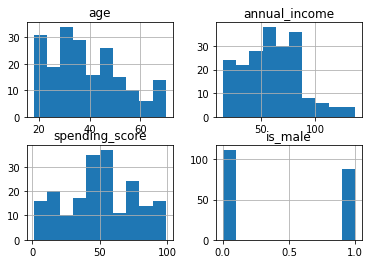

In [21]:
#df.hist()

In [22]:
#DOES SPENDING DIFFER ACROSS GENDER

<AxesSubplot:xlabel='gender', ylabel='spending_score'>

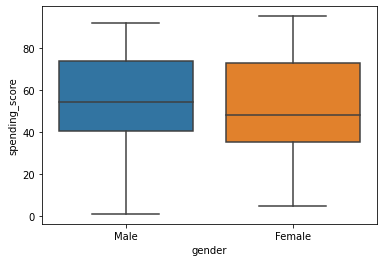

In [23]:
sns.boxplot(data=train, x='gender', y = 'spending_score')

<AxesSubplot:xlabel='gender', ylabel='spending_score'>

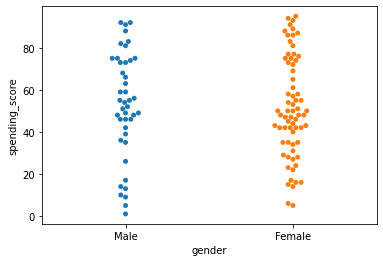

In [25]:
sns.swarmplot(data=train, x='gender', y ='spending_score')

In [26]:
#IS THERE RELATIONSHIP B/W SPENDING SCORE AND INCOME 

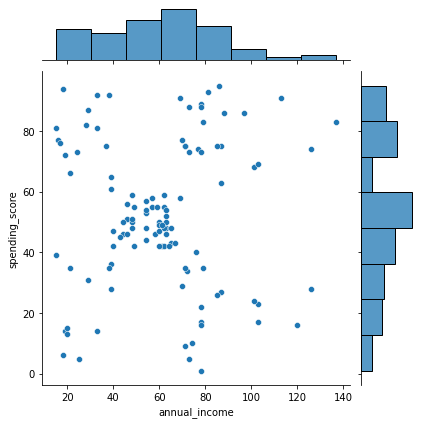

In [27]:
sns.jointplot(x='annual_income', y='spending_score', data=train)


In [28]:
#IS THERE A RELATIONSHIP BETWEEN AGE AND SPENDING?

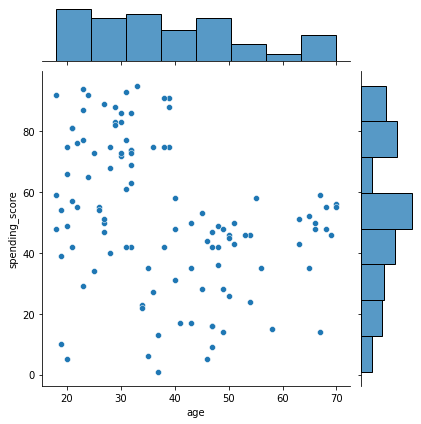

In [29]:
sns.jointplot(x='age', y='spending_score', data=train)


In [30]:
#ADDING A NAMED COLUMN WITH BINS FOR AGES

In [31]:
train['age_bin'] = pd.cut(train.age, [0, 40, 80])
train

,gender,age,annual_income,spending_score,is_male,age_bin
customer_id,,,,,,
124,Male,39,69,91,1,"(0, 40]"
77,Female,45,54,53,0,"(40, 80]"
172,Male,28,87,75,1,"(0, 40]"
11,Male,67,19,14,1,"(40, 80]"
36,Female,21,33,81,0,"(0, 40]"
...,...,...,...,...,...,...
176,Female,30,88,86,0,"(0, 40]"
102,Female,49,62,48,0,"(40, 80]"
149,Female,34,78,22,0,"(0, 40]"


<AxesSubplot:xlabel='age_bin', ylabel='spending_score'>

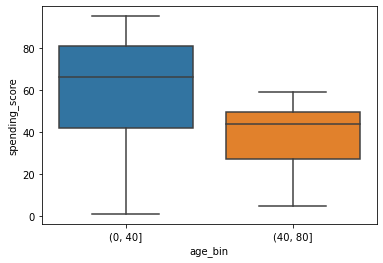

In [32]:
sns.boxplot(x=train.age_bin, y=train.spending_score)

In [33]:
stats.levene(
    train[train.age<=40].spending_score,
    train[train.age>40].spending_score)

LeveneResult(statistic=10.132989737896716, pvalue=0.001894076890348404)

In [34]:
stats.ttest_ind(
    train[train.age <= 40].spending_score,
    train[train.age > 40].spending_score,
    equal_var=False
)

Ttest_indResult(statistic=5.9507116594758225, pvalue=3.2322480940884824e-08)

In [35]:
#nope

Does spending score differ for income when controlling for age

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

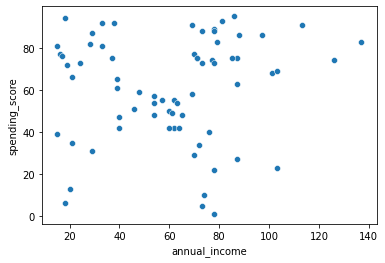

In [36]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age <= 40])


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

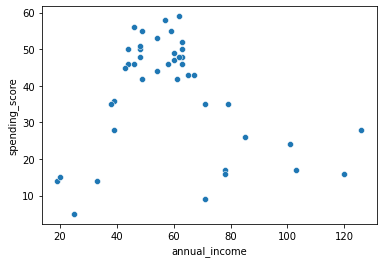

In [37]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age > 40])


<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

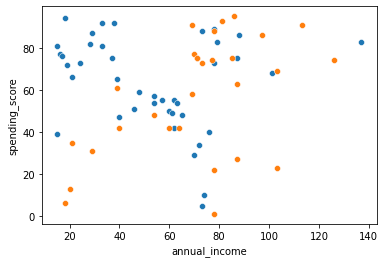

In [38]:
sns.scatterplot(x='annual_income', y='spending_score', data=train[train.age <= 30])
sns.scatterplot(x='annual_income', y='spending_score', data=train[(train.age > 30) & (train.age <=40)] )

In [39]:
train['income_bin'] = pd.cut(train.annual_income, [0, 40, 70, 140])


<AxesSubplot:xlabel='age', ylabel='spending_score'>

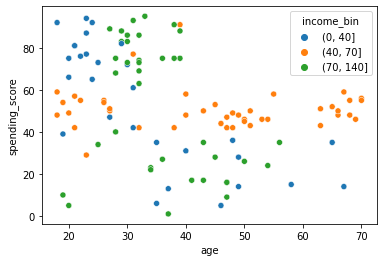

In [40]:
sns.scatterplot(x='age', y='spending_score', data=train, hue='income_bin')


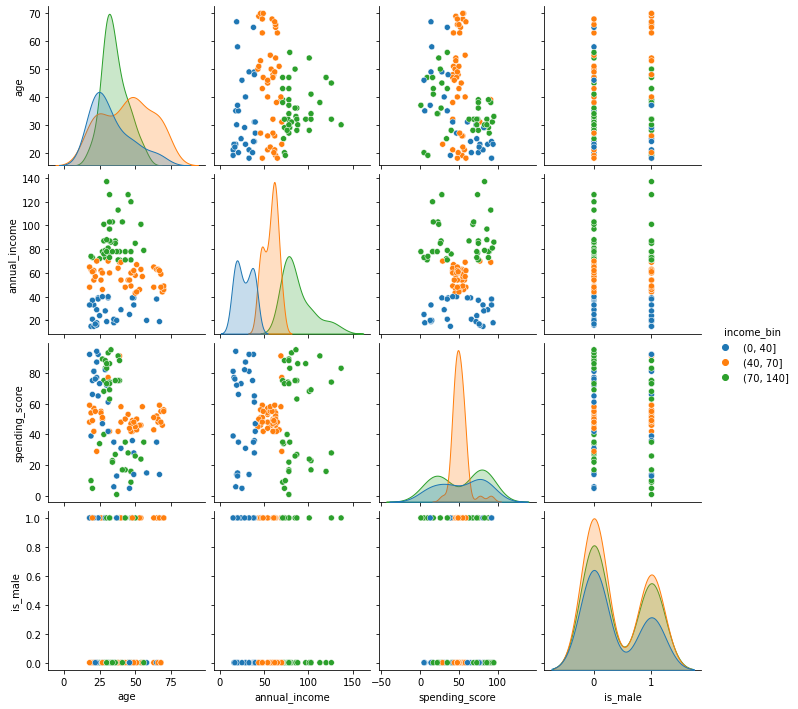

In [41]:
sns.pairplot(train, hue='income_bin')
